In [4]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

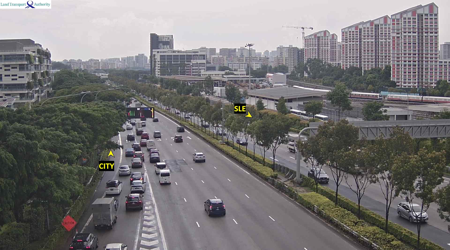

In [5]:
image = Image.open("1.jpg")
image = image.resize((450,250))
image_arr = np.array(image)
image

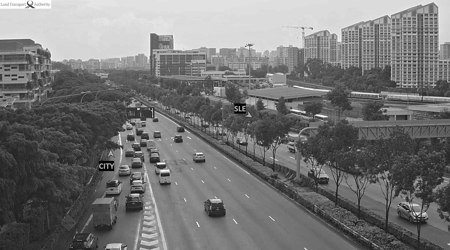

In [6]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

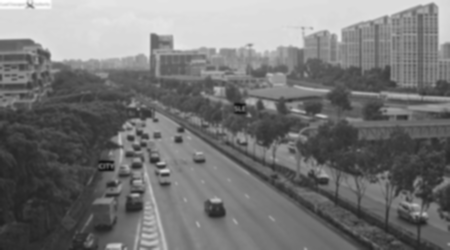

In [7]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

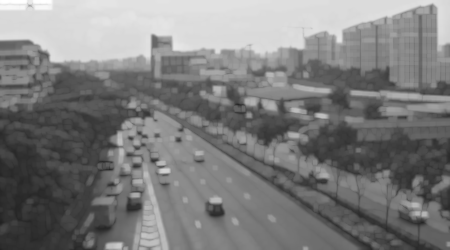

In [8]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

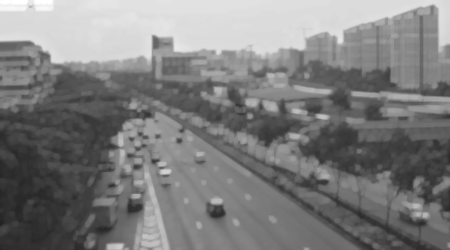

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [10]:
car_cascade = cv2.CascadeClassifier('cars.xml')
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[ 16,  83,  21,  21],
       [128, 153,  20,  20],
       [116, 143,  23,  23],
       [256, 162,  28,  28],
       [150, 171,  26,  26],
       [115, 184,  37,  37],
       [186, 178,  60,  60]], dtype=int32)

7  cars found


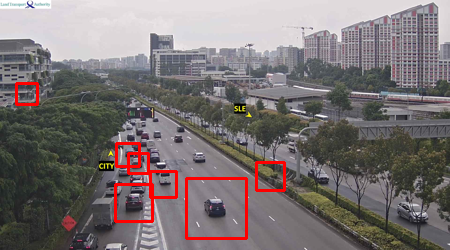

In [11]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)